# Complete Notebook

## Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow import keras
from keras.layers import Input, Lambda, Dense, Flatten, Dropout
from keras.models import Model
from tensorflow.keras.applications.resnet import ResNet152
from keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline 

## Initializing Parameters

In [3]:
IMAGE_SIZE = [256, 256, 3]

train_path = '/kaggle/input/covid19-chest-xray-processed-dataset/Dataset/Train'
test_path = '/kaggle/input/covid19-chest-xray-processed-dataset/Dataset/Test'
val_path = '/kaggle/input/covid19-chest-xray-processed-dataset/Dataset/Val'

## Data Augmentation

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)




# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/kaggle/input/covid19-chest-xray-processed-dataset/Dataset/Train',
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


test_set = test_datagen.flow_from_directory('/kaggle/input/covid19-chest-xray-processed-dataset/Dataset/Test',
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'categorical')


val_set = test_datagen.flow_from_directory('/kaggle/input/covid19-chest-xray-processed-dataset/Dataset/Val',
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3641 images belonging to 2 classes.
Found 455 images belonging to 2 classes.
Found 455 images belonging to 2 classes.


## ResNet152

In [5]:
base_model_resnet152 = ResNet152(input_shape=IMAGE_SIZE, weights='imagenet', include_top=False, pooling='max')

234700800/234698864 [==============================] - 5s 0us/step


In [6]:
for layer in base_model_resnet152.layers:
    layer.trainable = False

## Building Model

In [7]:
x = base_model_resnet152.output
x = Flatten()(x)

# x = Dense(1024, activation='relu')(x)
# x = Dropout(0.5)(x)
# prediction = Dense(2,activation = "sigmoid")(x)
# model_final = Model(base_model_eff0.input,prediction)

prediction = Dense(2, activation='softmax')(x)
final_model = Model(inputs=base_model_resnet152.input, outputs=prediction)

In [8]:
final_model.compile(
  loss='categorical_crossentropy',
  optimizer='SGD',
  metrics=['accuracy']
)

In [9]:
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

## Training

In [10]:
history = final_model.fit_generator(
  training_set,
  validation_data=val_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set)
)

Epoch 1/100
114/114 [==============================] - 293s 2s/step - loss: 11.0768 - accuracy: 0.6041 - val_loss: 18.5031 - val_accuracy: 0.2813
Epoch 2/100
114/114 [==============================] - 182s 2s/step - loss: 8.9041 - accuracy: 0.6421 - val_loss: 12.2030 - val_accuracy: 0.7187
Epoch 3/100
114/114 [==============================] - 184s 2s/step - loss: 5.7672 - accuracy: 0.6982 - val_loss: 2.7598 - val_accuracy: 0.7209
Epoch 4/100
114/114 [==============================] - 182s 2s/step - loss: 5.4995 - accuracy: 0.6878 - val_loss: 0.4537 - val_accuracy: 0.9231
Epoch 5/100
114/114 [==============================] - 182s 2s/step - loss: 2.7188 - accuracy: 0.7829 - val_loss: 1.0138 - val_accuracy: 0.8088
Epoch 6/100
114/114 [==============================] - 182s 2s/step - loss: 4.5680 - accuracy: 0.6984 - val_loss: 10.2140 - val_accuracy: 0.7187
Epoch 7/100
114/114 [==============================] - 184s 2s/step - loss: 3.0218 - accuracy: 0.7778 - val_loss: 0.3709 - val_accur

## Testing

In [11]:
print("Evaluating on test data ....")
results = final_model.evaluate(test_set, batch_size=32)
print("test loss, test acc:", results)

Evaluating on test data ....
15/15 [==============================] - 37s 3s/step - loss: 0.2363 - accuracy: 0.9516
test loss, test acc: [0.23625347018241882, 0.9516483545303345]


## Plotting 

In [12]:
history.history

{'loss': [10.684260368347168,
  7.788601398468018,
  5.417398452758789,
  5.065317153930664,
  1.8676546812057495,
  3.927245855331421,
  2.4241411685943604,
  2.0708868503570557,
  1.7299048900604248,
  1.2296748161315918,
  1.5920155048370361,
  0.9592445492744446,
  1.3520432710647583,
  1.2308275699615479,
  1.3289116621017456,
  1.1296379566192627,
  0.7227645516395569,
  1.0649056434631348,
  1.4092282056808472,
  1.242255449295044,
  0.8309407234191895,
  0.5090427994728088,
  1.0780915021896362,
  1.1086751222610474,
  1.0602848529815674,
  0.7232718467712402,
  0.7490447759628296,
  0.7148160338401794,
  0.854911208152771,
  0.7743619084358215,
  1.368699312210083,
  0.6727081537246704,
  0.8686231970787048,
  1.0164140462875366,
  0.6151629686355591,
  0.7484422922134399,
  0.8207346200942993,
  0.64549720287323,
  1.0162585973739624,
  1.0672279596328735,
  1.1245639324188232,
  0.5978002548217773,
  0.5090030431747437,
  1.1362881660461426,
  0.3814988136291504,
  0.5822327

### Accuracy vs Epochs

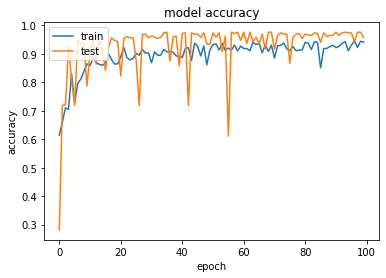

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


### Loss vs Epochs

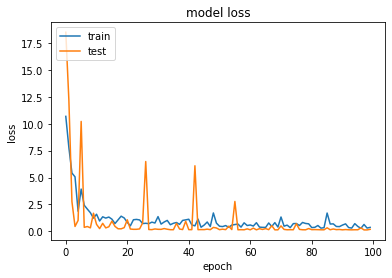

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()